<a href="https://colab.research.google.com/github/JohnT623/Music-Computing/blob/main/assignments/labAssignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import scipy.signal as sg
# import audio files
!git clone https://github.com/jcdevaney/musicComputing2025.git

Cloning into 'musicComputing2025'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 176 (delta 31), reused 5 (delta 3), pack-reused 113 (from 1)
Receiving objects: 100% (176/176), 28.59 MiB | 9.41 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [2]:
def plotTimeFreq(sig,sr,title,winSize,specType,fig):

    # Adjust the x-axis to represent time
    time=np.arange(0,sig.shape[0])/sr

    # Scale the y-axis to represent amplitude from -1 to 1
    excursion=max(abs(sig))
    sigNew = sig / excursion

    # Label the x and y axes with variables
    xlabel = 'Time (seconds)'
    ylabel = 'Amplitude'

    # Create a new figure (using the figure number passed in as an argument)
    plt.figure(fig)

    # Create the first subplot
    plt.subplot(2,1,1)

    # Plot the time-domain representation of the inputted audio signal
    plt.plot(time,sigNew)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Create the second subplot
    plt.subplot(2,1,2)

    # Plot the frequency-domain representatio of the inputted audio signal
    spec = librosa.amplitude_to_db(np.abs(librosa.stft(sig,n_fft=winSize)), ref=np.max)
    librosa.display.specshow(spec, y_axis=specType)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show

In [44]:
def filterSignal(sig, sr, freq, filtType, order, winSize, specType, fig):

    # Inputs
    #   - signal to filter (sig)
    #   - sampling rate of the signal (sr)
    #   - filter frequency/frequencies (freq)
    #   - filter type (filtType)
    #   - order of the filter (order)
    #   - window size for the FFT (winSize)
    #   - type of spectrogram, log or linear (specType)
    #   - figure number (fig)

    # use an if/elif/else statement with ‘or’ tests to set up the parameters for the different   type of filter based on the code in filters.ipynb and or.ipynb, specifically
	  #   if the filter type is ‘low’ or ‘high’
		#       filterFreq = freq / (sr / 2)
	  #   if the filter type if ‘bandpass’ or ‘bandstop’
		#       filterFreq = [freq[0] / (sr / 2), freq[1] / (sr / 2)]
    if filtType == 'low' or filtType == 'high':
        filterFreq = freq / (sr / 2)
    if filtType == 'bandpass' or filtType == 'bandstop':
        filterFreq = [freq[0] / (sr / 2), freq[1] / (sr / 2)]

    # create a filter using using sg.butter()
    b, a = sg.butter(order, filterFreq, filtType)
    # run the created filter on the inputting signal using sg.filtfilt()
    sig_fil1a = sg.filtfilt(b, a, sig)
    # plot the filtered signal with plotTimeFreq()
    plotTimeFreq(sig, sr, filtType, winSize, specType, fig)
    # return the filtered signal
    return sig

In [48]:
def allFilters(sig, sr, freq, width, order, winSize, specType):

    # Inputs
    #   - signal to filter (sig)
    #   - sampling rate of the signal (sr)
    #   - filter frequency (freq)
    #   - distance between the low and high band frequencies (width)
    #   - order of the filter (order)
    #   - window size for the FFT (winSize)
    #   - type of spectrogram, log or linear (specType)

    # call filterSignal() to run a low-pass filter on the inputting signal using
    # the inputting filter frequency and filter order
    # set fig equal to 1
    sig_lp = filterSignal(sig, sr, freq, 'low', order, winSize, specType, 1)
    fig = 1

    # call filterSignal() to run a high-pass filter on the inputting signal
    # using the inputting filter frequency and filter order
    # set fig equal to 2
    sig_hp = filterSignal(sig, sr, freq, 'high', order, winSize, specType, 2)
    fig = 2

    #call filterSignal() to run a band-pass filter on the inputting signal using
    # the inputting filter frequency and filter order – filter frequency will be
    # calculated using the inputted width parameter like this:
    #                   [freq-width,freq+width]
    # set fig equal to 3
    sig_bp = filterSignal(sig, sr, [freq-width,freq+width], 'bandpass', order, winSize, specType, 3)
    fig = 3
    # call filterSignal() to run a band-stop filter on the inputting signal using
    # the inputting filter frequency and filter order – filter frequency will be
    # calculated using the inputted width parameter like this:
    #                   [freq-width,freq+width]
    # set fig equal to 4
    sig_bs = filterSignal(sig, sr, [freq-width,freq+width], 'bandstop', order, winSize, specType, 4)
    fig = 4

    # return the output of the low-pass, high-pass, bandpass, and bandstop
    # filtered signals
    return sig_lp, sig_hp, sig_bp, sig_bs

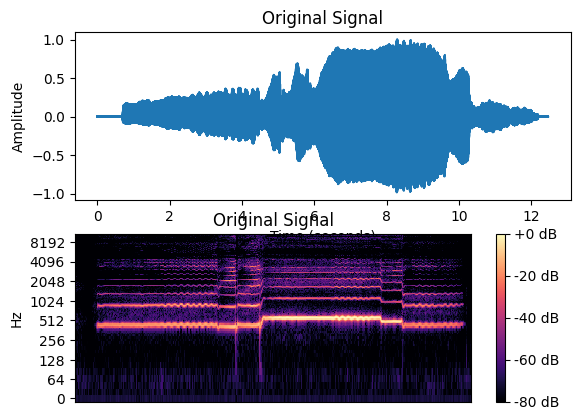

In [46]:
sig , sr = librosa.load('musicComputing2025/audioFiles/avm.wav')
winSize = 1024
specType = 'log'
fig = 1

# Plot original signal with plotTimeFreq()
plotTimeFreq(sig, sr, 'Original Signal', winSize, specType, fig)
# Play original signal with IPython.display.Audio()
IPython.display.Audio(sig, rate=sr)

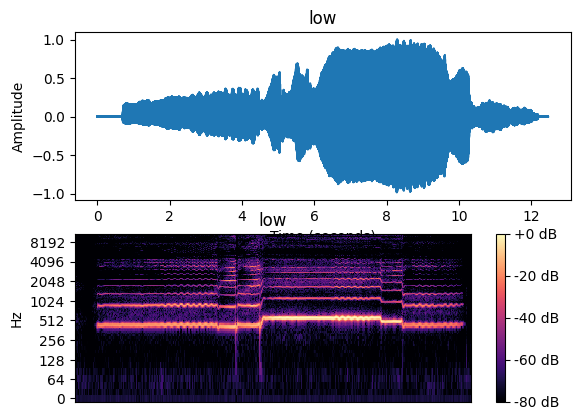

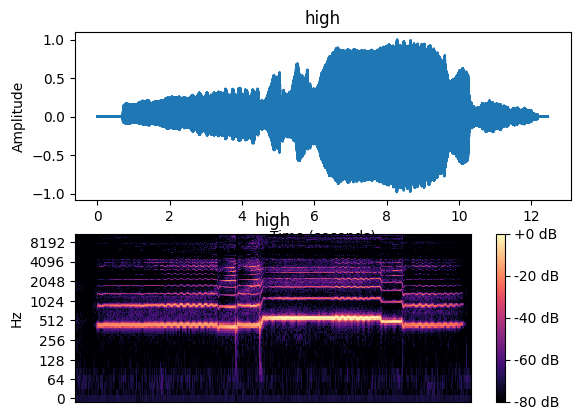

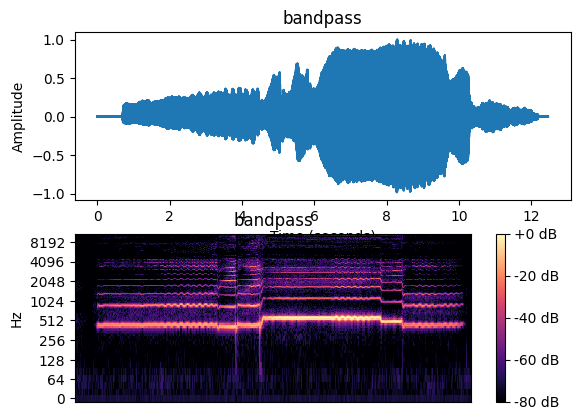

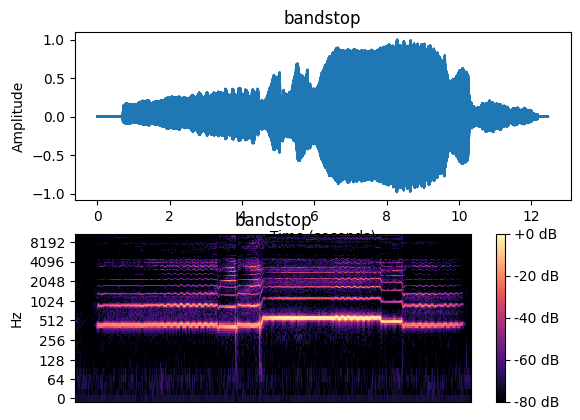

In [50]:
freq = 600
width = 200
order = 4

# call allFilters() and save the output as sig_lp, sig_hp, sig_bp, sig_bs
sig_lp, sig_hp, sig_bp, sig_bs = allFilters(sig, sr, freq, width, order, winSize, specType)

In [51]:
# play the low-pass version of the signal with IPython.display.Audio()
IPython.display.Audio(sig_lp, rate=sr)

In [52]:
# play the high-pass version of the signal with IPython.display.Audio()
IPython.display.Audio(sig_hp, rate=sr)

In [53]:
# play the band-pass version of the signal with IPython.display.Audio()
IPython.display.Audio(sig_bp, rate=sr)

In [54]:
# play the band-stop version of the signal with IPython.display.Audio()
IPython.display.Audio(sig_bs, rate=sr)